## Traffic Light Controlled Intersection

https://leetcode.com/problems/traffic-light-controlled-intersection/


1279. Traffic Light Controlled Intersection

There is an intersection of two roads. First road is road A where cars travel from North to South in direction 1 and from South to North in direction 2. Second road is road B where cars travel from West to East in direction 3 and from East to West in direction 4.


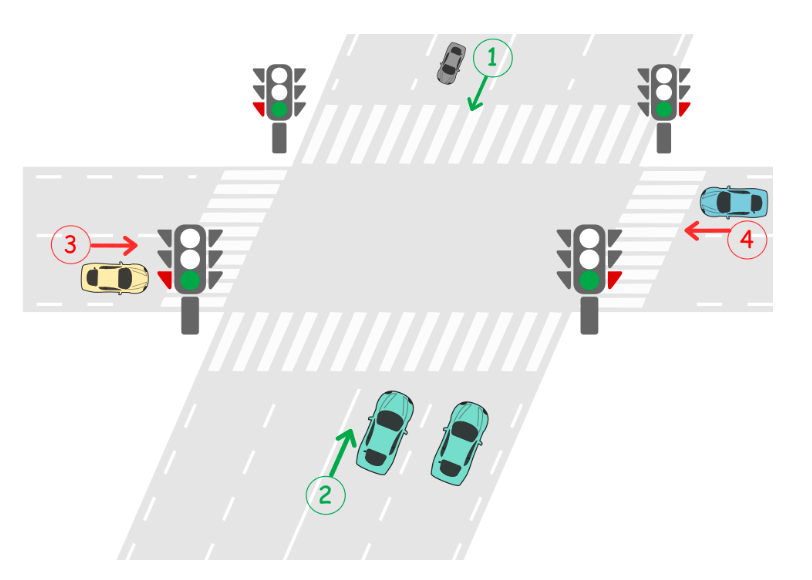


There is a traffic light located on each road before the intersection. A traffic light can either be green or red.

 1. Green means cars can cross the intersection in both directions of the road.
Red means cars in both directions cannot cross the intersection and must wait until the light turns green.
The traffic lights cannot be green on both roads at the same time. That means when the light is green on road A, it is red on road B and when the light is green on road B, it is red on road A.

2. Initially, the traffic light is green on road A and red on road B. When the light is green on one road, all cars can cross the intersection in both directions until the light becomes green on the other road. No two cars traveling on different roads should cross at the same time.

Design a deadlock-free traffic light controlled system at this intersection.

Implement the function void carArrived(carId, roadId, direction, turnGreen, crossCar) where:

 - carId is the id of the car that arrived.
 - roadId is the id of the road that the car travels on.
 - direction is the direction of the car.
 - turnGreen is a function you can call to turn the traffic light to green on the current road.
 - crossCar is a function you can call to let the current car cross the intersection.
 - Your answer is considered correct if it avoids cars deadlock in the intersection. Turning the light green on a road when it was already green is considered a wrong answer.

 

#### Example 1:

Input: cars = [1,3,5,2,4], directions = [2,1,2,4,3], arrivalTimes = [10,20,30,40,50] <br>
Output: [
"Car 1 Has Passed Road A In Direction 2",    // Traffic light on road A is green, car 1 can cross the intersection.
"Car 3 Has Passed Road A In Direction 1",    // Car 3 crosses the intersection as the light is still green.
"Car 5 Has Passed Road A In Direction 2",    // Car 5 crosses the intersection as the light is still green.
"Traffic Light On Road B Is Green",          // Car 2 requests green light for road B.
"Car 2 Has Passed Road B In Direction 4",    // Car 2 crosses as the light is green on road B now.
"Car 4 Has Passed Road B In Direction 3"     // Car 4 crosses the intersection as the light is still green.
]
<br>
<br>
#### Example 2:

Input: cars = [1,2,3,4,5], directions = [2,4,3,3,1], arrivalTimes = [10,20,30,40,40]<br>
Output: [
"Car 1 Has Passed Road A In Direction 2",    // Traffic light on road A is green, car 1 can cross the intersection.
"Traffic Light On Road B Is Green",          // Car 2 requests green light for road B.
"Car 2 Has Passed Road B In Direction 4",    // Car 2 crosses as the light is green on road B now.
"Car 3 Has Passed Road B In Direction 3",    // Car 3 crosses as the light is green on road B now.
"Traffic Light On Road A Is Green",          // Car 5 requests green light for road A.
"Car 5 Has Passed Road A In Direction 1",    // Car 5 crosses as the light is green on road A now.
"Traffic Light On Road B Is Green",          // Car 4 requests green light for road B. Car 4 blocked until car 5 crosses and then traffic light is green on road B.
"Car 4 Has Passed Road B In Direction 3"     // Car 4 crosses as the light is green on road B now.
]
<br>
<br>
#### Explanation: 
This is a dead-lock free scenario. Note that the scenario when car 4 crosses before turning light into green on road A and allowing car 5 to pass is also correct and Accepted scenario.
 

Constraints:

 - 1 <= cars.length <= 20
 - cars.length = directions.length 
 - cars.length = arrivalTimes.length<br>
 - All values of cars are unique<br>
 - 1 <= directions[i] <= 4<br>
 - arrivalTimes is non-decreasing<br>

#### Given: 

In [ ]:
class TrafficLight:
    def __init__(self):
        pass

    def carArrived(
        self,
        carId: int,                      # ID of the car
        roadId: int,                     # ID of the road the car travels on. Can be 1 (road A) or 2 (road B)
        direction: int,                  # Direction of the car
        turnGreen: 'Callable[[], None]', # Use turnGreen() to turn light to green on current road
        crossCar: 'Callable[[], None]'   # Use crossCar() to make car cross the intersection
    ) -> None:
       

#### Solution: 

In [2]:
class TrafficLight:
    def __init__(self):
        self.current_green = 1           # set current greenlight to road A

    def carArrived(
        self,
        carId: int,                      # ID of the car
        roadId: int,                     # ID of the road the car travels on. Can be 1 (road A) or 2 (road B)
        direction: int,                  # Direction of the car
        turnGreen: 'Callable[[], None]', # Use turnGreen() to turn light to green on current road
        crossCar: 'Callable[[], None]'   # Use crossCar() to make car cross the intersection
    ) -> None:
        
        if self.current_green != roadId: # if current green signal is not road A (first occurrence)
            turnGreen()                  # change light to green
            self.current_green = roadId  # change green to Road B (or back to A for later occurrences)
                
        crossCar()                       # make car cross

#### Explicit Solution: 